<a href="https://colab.research.google.com/github/YinhaoHe/Python-AI-teaching/blob/master/machine_learning_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised machine learning in Python <br> with scikit-learn


# Machine learning in Python with scikit-learn

## scikit-learn

- Popular Python machine learning library

- Designed to be a [well documented](http://scikit-learn.org/stable/) and approachable for non-specialist

- Built on top of NumPy and SciPy

- scikit-learn can be easily installed with `pip` or `conda`

    - `pip install scikit-learn`

    - `conda install scikit-learn`
    
- [API design for machine learning software:
experiences from the scikit-learn project](https://arxiv.org/pdf/1309.0238.pdf) &mdash; for a discusses of the API design choices for scikit-learn

## Data representation in scikit-learn

- Training dataset is described by a pair of matrices, one for the input data and one for the output

- Most commonly used data formats are a NumPy `ndarray` or a Pandas `DataFrame` / `Series`

- Each row of these matrices corresponds to one sample of the dataset

- Each column represents a quantitative piece of information that is used to describe each sample (called "features") 

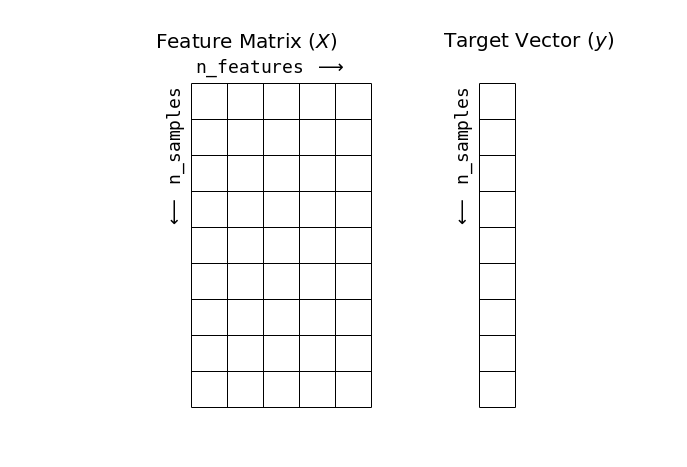

In [ ]:
plotting.plot_data_representation()

## Iris dataset

- Dataset consists of 150 samples (individual flowers) that have 4 features: sepal length, sepal width, petal length, and petal width (all in cm)
    
- Each sample is labeled by its species: Iris Setosa, Iris Versicolour, Iris Virginica

- Task is to develop a model that predicts iris species
    
- Iris dataset is freely available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)



## Loading the iris dataset from scikit-learn

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
# Only include first two training features (sepal length and sepal width)
X = X[:, :2]

print(f'First 5 samples in X: \n{X[:5]}')
print(f'Labels: \n{y}')

First 5 samples in X: 
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


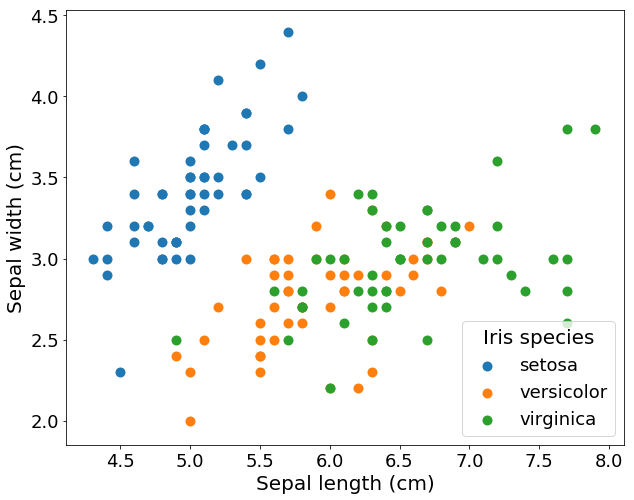

In [ ]:
plotting.plot_2D_iris()

## Estimators in scikit-learn

- Algorithms are implemented as estimator classes in scikit-learn

- Each estimator in scikit-learn is extensively documented (e.g. the [KNeighborsClassifier documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) with API documentation, user guides, and example usages. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, LogisticRegression

- A model is an instance of one of these estimator classes

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## Estimator API

<br>

```python
class Estimator(BaseClass):

    def __init__(self, **hyperparameters):
        # Setup Estimator here
        
    def fit(self, X, y):
        # Implement algorithm here
        
        return self
       
    def predict(self, X):
        # Get predicted target from trained model
        # Note: fit must be called before predict
        
        return y_pred
```

## Training a model &mdash; fit then predict

In [ ]:
# Create the model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
model.fit(X, y)

# Get model predictions
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

# Model validation

## Model performance metrics

- There are many different performance metrics for classification and regression problems. Which metric you should use depends on the particular problem you are working on

- Many commonly used performance metrics are built into the `metrics` subpackage in scikit-learn 

- However, a user-defined scoring function can be created using the `sklearn.metrics.make_scorer` function

In [ ]:
# Classification metrics
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score, log_loss)
# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
y_pred = [0, 2, 1, 3, 1]
y_true = [0, 1, 1, 3, 2]

In [ ]:
accuracy_score(y_true, y_pred)

0.6

In [ ]:
mean_squared_error(y_true, y_pred)

0.4

## Separate training & testing sets

- A trained model will generally perform better on data that was used to train it

- Want to measure how well a model generalizes to new, unseen data

- Need to have two separate datasets. One for training models and one for evaluating model performance

- scikit-learn has a convenient `train_test_split` function that randomly splits a dataset into a testing and training set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)

print(f'X.shape = {X.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'X_train.shape = {X_train.shape}')

X.shape = (150, 2)
X_test.shape = (30, 2)
X_train.shape = (120, 2)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(f'training accuracy = {accuracy_score(y_train, clf.predict(X_train))}')
print(f'testing accuracy = {accuracy_score(y_test, clf.predict(X_test))}')

training accuracy = 0.9333333333333333
testing accuracy = 0.6666666666666666


## Model selection &mdash; hyperparameter optimization

- Choose model hyperparameter values to avoid under- and over-fitting

- Under-fitting &mdash; model isn't sufficiently complex enough to properly model the dataset at hand

- Over-fitting &mdash; model is too complex and begins to learn the noise in the training dataset

![overview](images/underfitting_overfitting.png "overview")

<p style="font-size:14px">
Image source: <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html">Underfitting vs. Overfitting</a> in scikit-learn examples
</p>

## $k$-fold cross validation diagram

![Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.](images/kfold.png "Classical programming vs. machine learning. From *Deep Learning with Python* by Francois Chollet.")


<p style="font-size:14px">
Image source: Raschka, Sebastian, and Vahid Mirjalili. <a href="https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939">Python Machine Learning</a>, 2nd Ed. Packt Publishing, 2017.
</p>

## Cross validation in scikit-learn

In [ ]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(max_depth=2)
scores = cross_validate(clf, X_train, y_train,
                        scoring='accuracy', cv=10,
                        return_train_score=True)

print(scores.keys())
test_scores = scores['test_score']
train_scores = scores['train_score']
print(test_scores)
print(train_scores)

print('\n10-fold CV scores:')
print(f'training score = {np.mean(train_scores)} +/- {np.std(train_scores)}')
print(f'validation score = {np.mean(test_scores)} +/- {np.std(test_scores)}')

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.78571429 0.64285714 0.83333333 0.66666667 1.         0.91666667
 0.54545455 0.72727273 0.81818182 0.72727273]
[0.79245283 0.79245283 0.76851852 0.80555556 0.75       0.77777778
 0.79816514 0.79816514 0.78899083 0.79816514]

10-fold CV scores:
training score = 0.787024375076132 +/- 0.016054059411612778
validation score = 0.7663419913419914 +/- 0.12718955265834164


## Validation curves

Validation curves are a good way to diagnose if a model is under- or over-fitting

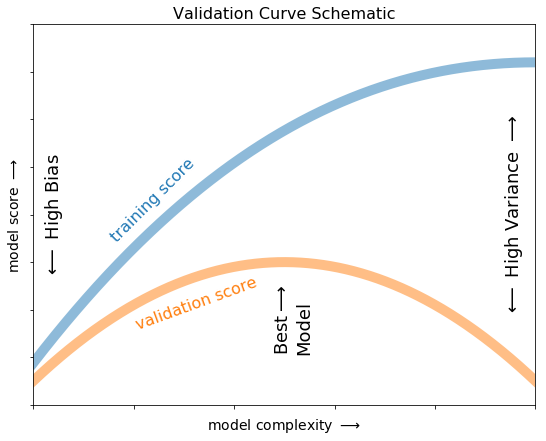

In [ ]:
plotting.plot_validation_curve()

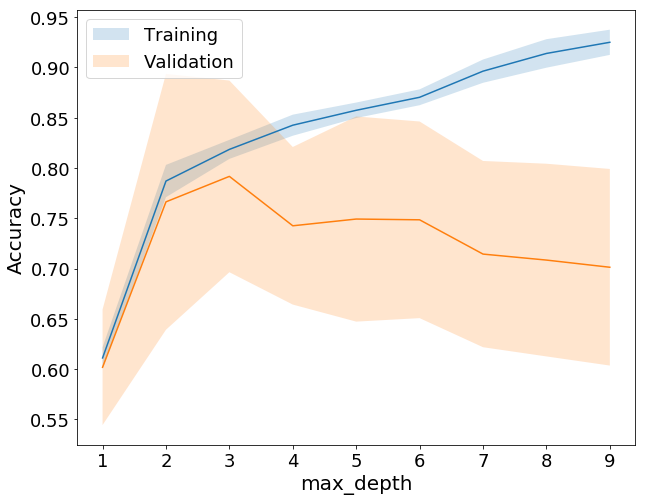

In [ ]:
plotting.plot_max_depth_validation(clf, X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate a model
clf = DecisionTreeClassifier()

# Specify hyperparameter values to test
parameters = {'max_depth': range(1, 20),
              'criterion': ['gini', 'entropy']}

# Run grid search
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=10)
gridsearch.fit(X_train, y_train)

# Get best model
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')
print(gridsearch.best_estimator_)

gridsearch.best_params_ = {'criterion': 'gini', 'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2)

## Iris classification problem

In [ ]:
# Step 1: Get training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=2)

# Step 2: Use GridSearchCV to find optimal hyperparameter values
clf = DecisionTreeClassifier(random_state=2)
parameters = {'max_depth': range(1, 20),
              'criterion': ['gini', 'entropy']}
gridsearch = GridSearchCV(clf, parameters, scoring='accuracy', cv=10)
gridsearch.fit(X_train, y_train)
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

# Step 3: Get model with best hyperparameters
best_clf = gridsearch.best_estimator_

# Step 4: Get best model performance from testing set
y_pred = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f'test_acc = {test_acc}')

# Step 5: Train final model on full dataset
final_model = DecisionTreeClassifier(random_state=2, **gridsearch.best_params_)
final_model.fit(X, y);

gridsearch.best_params_ = {'criterion': 'gini', 'max_depth': 3}
test_acc = 0.8
